# Demo: Phases of 2D Rydberg-Atom Square Lattices

Haoxiang Wang (hwang264@illinois.edu)

In [1]:
import sys
# to read modules from the parent directory
sys.path.insert(0,'..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.eval.eval_rydberg import fourier_transform_square_lattice
%matplotlib inline

In [3]:
nx = 5
ny = 5
densities = {}

## Lattice Space (Excitation Density)

Text(0.5, 1.0, 'Checkboard Phase')

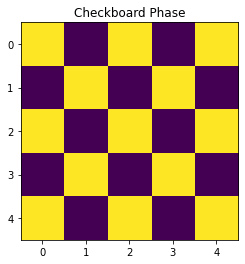

In [4]:
density = np.zeros(nx*ny)
density[::2] = 1
densities['Checkboard'] = density
plt.imshow(density.reshape(nx,ny))
plt.title('Checkboard Phase')

Text(0.5, 1.0, 'Striated Phase')

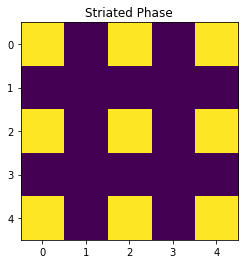

In [5]:
density = np.zeros(25)
density[[0,2,4,10,12,14,20,22,24]] = 1
densities['Striated'] = density
plt.imshow(density.reshape(nx,ny))
plt.title('Striated Phase')

Text(0.5, 1.0, 'Staggered Phase')

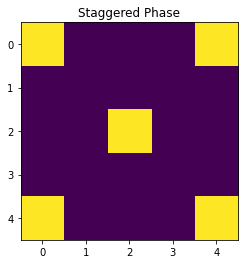

In [6]:
density = np.zeros(25)
density[[0,4,12,20,24]] = 1
densities['Staggered'] = density
plt.imshow(density.reshape(nx,ny))
plt.title('Staggered Phase')

In [7]:
ks = np.linspace(-np.pi,np.pi,51,endpoint=True)

kx,ky = np.meshgrid(ks,ks)

kxy = np.stack([kx,ky]).transpose([1,2,0]).reshape(-1,2)

Fs = {}
F_max = 0
for key,density in densities.items():
    F_kxy = fourier_transform_square_lattice(density,kxy,nx,ny)
    Fs[key] = F_kxy
    F_max = max(F_max, F_kxy.max())

## Fourier Space

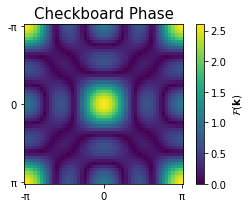

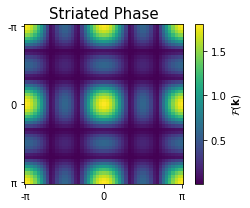

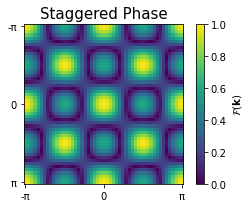

In [8]:
# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,3.5))
for i, (key, F) in enumerate(Fs.items()):
    fig = plt.figure(figsize=(4,3))
    plt.imshow(F.reshape(len(ks),len(ks)),)
    plt.title(f'{key} Phase',fontsize=15)
    plt.colorbar(label=r'$\mathcal{F}(\mathbf{k})$',)
    plt.xticks([0,25,50],['-π','0','π'])
    plt.yticks([0,25,50],['-π','0','π'])
    fig.tight_layout()